# Assignment: Unsupervised Machine Learning \ Genetic Algorithms

In this assignment you will experience with Genetic Algorithms (GAs), starting from a basic implementation, continuing with dedicated improvements, and later applying it in various unsupervised machine learning scenarios.

## Part 1: Time Series of 'Likes' Influenced by Personalization

Various personalization algorithms are applied in e-commerce and other kinds of websites/apps in order to increase purchases or user engagement.

The following time series were collected over a period of 20 months from a large online retail store. In this study, during the first 10 months (normalized as the period from month -10 to month 0) a contextual personalization algorithm was applied in order to increase user engagement (measured as the accumulated number of 'Likes' on products shared via Facebook). As in the case with many contextual approaches, this algorithm suffered from the 'filter bubble' problem (https://en.wikipedia.org/wiki/Filter_bubble), and therefore reached a plateau quite quickly.

Nonetheless, this step enabled a more advanced collaborative filtering algorithm to analyze the collected data, learn, and increase user engagement once it was applied in the following 10 months. A classic inflection point was detected after the transition to the new algorithm. A domain expert envisioned the inflection dynamics will behave similarly to the formula f(x) = ax^3 + bx^2 + cx + d. The values of a, b, c and d were found to be 4.8, 12.1, 53.2 and 6219, respectively.

<< Please note: This function is an analytical solution, used here for simplifying the actual study, where a dynamic model was created with ODEs >>

We are given a sample sparse data of users from 10 different European countries. In this project, we will implement a simple GA in order to fit our data to the above-mentioned function, and discover the parameters for a, b, c and d. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Read measured data from an Excel file

In [10]:
xlsx = pd.ExcelFile('European Measurements.xlsx')
sheet1 = xlsx.parse(3) # Note the other datasets in the file.
variables = ["Month","Avg. Likes"]
data = sheet1.loc[:, variables].values
print(data)

[[-9.70000000e+00  1.93303385e+03]
 [-9.10000000e+00  3.07678202e+03]
 [-7.70000000e+00  4.61959427e+03]
 [-7.30000000e+00  4.87640388e+03]
 [-7.20000000e+00  5.27621777e+03]
 [-6.20000000e+00  5.76967851e+03]
 [-4.70000000e+00  5.26728526e+03]
 [-4.10000000e+00  6.40777934e+03]
 [-3.30000000e+00  6.05631612e+03]
 [-2.70000000e+00  6.10216500e+03]
 [-2.50000000e+00  5.18359545e+03]
 [-2.30000000e+00  7.03041233e+03]
 [-1.90000000e+00  5.69790109e+03]
 [-1.80000000e+00  5.42920417e+03]
 [-1.20000000e+00  5.23662184e+03]
 [-9.00000000e-01  6.28278124e+03]
 [-1.00000000e-01  6.53285159e+03]
 [ 2.00000000e-01  5.78284515e+03]
 [ 3.00000000e-01  6.57445814e+03]
 [ 4.00000000e-01  5.25761264e+03]
 [ 1.10000000e+00  5.86568880e+03]
 [ 1.50000000e+00  6.92127198e+03]
 [ 1.60000000e+00  6.15982519e+03]
 [ 2.10000000e+00  6.87265063e+03]
 [ 2.20000000e+00  5.57408399e+03]
 [ 2.50000000e+00  5.88485867e+03]
 [ 5.20000000e+00  6.75130936e+03]
 [ 5.40000000e+00  7.32399792e+03]
 [ 5.90000000e+00  7

### Simple GA mechanism

In [11]:
def fitness_function(data, pop):
    fitness = []
    for solution in range(len(pop)):
        error = 0;
        for event in range(len(data)):
            event_time = data[event][0]
            event_measured = data[event][1]
            event_expected = pop[solution][0]*event_time**3 + pop[solution][1]*event_time**2 + pop[solution][2]*event_time + pop[solution][3]
            error +=(event_expected - event_measured)**2
        fitness.append(1/error) # We use 1/error in order to use a maximization mechanism, while we want to minimize the error
    return fitness

def biased_selection(pop, fitness, num_parents):
    sorted_fitness_args = np.argsort(fitness)
    return pop[sorted_fitness_args[-num_parents:],:]
    # parents = np.empty((num_parents, pop.shape[1]))
    # for parent_num in range(num_parents):
    #     max_fitness_idx = np.where(fitness == np.max(fitness))
    #     max_fitness_idx = max_fitness_idx[0][0]
    #     parents[parent_num, :] = pop[max_fitness_idx, :]
    #     fitness[max_fitness_idx] = -99999999999
    # return parents

def recombination(parents, offspring_size):
    offspring = np.empty(offspring_size)
    recombination_point = np.uint8(offspring_size[1]/2)
    for k in range(offspring_size[0]):
        parent1_idx = k%parents.shape[0]
        parent2_idx = (k+1)%parents.shape[0]
        offspring[k, 0:recombination_point] = parents[parent1_idx, 0:recombination_point]
        offspring[k, recombination_point:] = parents[parent2_idx, recombination_point:]
    return offspring

def mutation(offspring_recombination):
    for idx in range(offspring_recombination.shape[0]):
        random_value = np.random.randint(-100, 100, 1)
        random_index = np.random.randint(0,offspring_recombination.shape[1],1)
        offspring_recombination[idx, random_index] = offspring_recombination[idx, random_index] + random_value
    return offspring_recombination


### GA application for fitting time series data

The population of the first generation: 
[[2196 8385 4482 7225]
 [ 360 7819 4360  986]
 [ 375 3497 1133 2759]
 ...
 [1285  105  360 5126]
 [8454  207 8899 2816]
 [1100  577  266 8810]]

Evolution:
Generation =  0 	Best fitness =  165413306948.96756
Generation =  1 	Best fitness =  63626201079.07439
Generation =  2 	Best fitness =  63626201079.07439
Generation =  3 	Best fitness =  63626201079.07439
Generation =  4 	Best fitness =  63626201079.07439
Generation =  5 	Best fitness =  16745941534.06412
Generation =  6 	Best fitness =  16745941534.06412
Generation =  7 	Best fitness =  6436366453.19949
Generation =  8 	Best fitness =  6381672242.09335
Generation =  9 	Best fitness =  3259780138.34894
Generation =  10 	Best fitness =  3259780138.34894
Generation =  11 	Best fitness =  3259780138.34894
Generation =  12 	Best fitness =  1145387699.72428
Generation =  13 	Best fitness =  1145387699.72428
Generation =  14 	Best fitness =  1136939521.78846
Generation =  15 	Best fitness =  113303

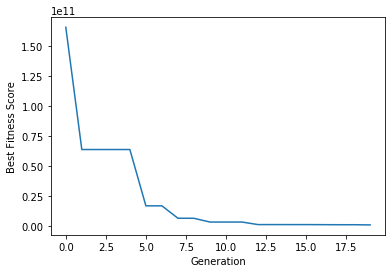

In [14]:
# GA Parameters
formula_degree = 4
number_of_solutions = 500
number_of_parents = 250
population_size = (number_of_solutions,formula_degree) 
number_of_generations = 20
best_outputs = []

# Genesis
new_population = np.random.randint(low=0, high=10000, size=population_size)
print("The population of the first generation: ")
print(new_population)

# Evolution
print ("\nEvolution:")
for generation in range(number_of_generations):

    fitness = fitness_function(data, new_population)
    print("Generation = ", generation, "\tBest fitness = ", round(1/np.max(fitness),5))
    # best_outputs.append(np.max(np.sum(new_population*formula_degree, axis=1)))
    best_outputs.append(round(1/np.max(fitness),5))
    parents = biased_selection(new_population, fitness, number_of_parents)
    offspring_recombination = recombination(parents, offspring_size=(population_size[0]-parents.shape[0], formula_degree))
    offspring_mutation = mutation(offspring_recombination)
    new_population[0:parents.shape[0], :] = parents
    new_population[parents.shape[0]:, :] = offspring_mutation

# Results
print("\nThe population of the last generation: ")
print(new_population)
fitness = fitness_function(data, new_population)
best_match_idx = np.where(fitness == np.max(fitness))
print("Best solution: ", new_population[best_match_idx, :])

# Chart
plt.plot(best_outputs)
plt.xlabel("Generation")
plt.ylabel("Best Fitness Score")
plt.show()

## Challenge 231
Implement a new and improved GA, based on the one above, by taking the following actions:

1. Make the bias_selection function give more chances to solutions with better fitness values, but not necesseraly take the best ones, as currently done.
2. Make the recombination function make real random recombination along the chromosome and between chromosomes
3. Change the mutation rate and/or scale to better avoid local minima while keeping evolution time short
4. Apply a smarter stopping criterion
5. Consider different GA parameters in order to reach better results

In [79]:
def fitness_function(data, pop):
    fitness = []
    for solution in range(len(pop)):
        error = 0;
        for event in range(len(data)):
            event_time = data[event][0]
            event_measured = data[event][1]
            event_expected = pop[solution][0]*event_time**3 + pop[solution][1]*event_time**2 + pop[solution][2]*event_time + pop[solution][3]
            error +=(event_expected - event_measured)**2
        fitness.append(1/error) # We use 1/error in order to use a maximization mechanism, while we want to minimize the error
    return fitness

def biased_selection(pop, fitness, num_parents):
    draw_index = np.random.choice(len(fitness), size=num_parents, replace=True, p=fitness/np.sum(fitness))
    return pop[draw_index,:]

def recombination(parents, offspring_size):
    offspring = np.empty(offspring_size)
    for k in range(offspring_size[0]):
        recombination_point = np.random.randint(0,offspring_size[1])
        parent1_idx = k%parents.shape[0]
        parent2_idx = (k+1)%parents.shape[0]
        offspring[k, 0:recombination_point] = parents[parent1_idx, 0:recombination_point]
        offspring[k, recombination_point:] = parents[parent2_idx, recombination_point:]
    return offspring

def mutation(offspring_recombination):
    for idx in range(offspring_recombination.shape[0]):
        if np.random.rand() > 0.5:
            random_value = np.random.randint(-100, 100, 1)
            random_index = np.random.randint(0,offspring_recombination.shape[1],1)
            offspring_recombination[idx, random_index] = offspring_recombination[idx, random_index] + random_value
    return offspring_recombination


The population of the first generation: 
[[ 642 3127 8180 5439]
 [3023 7790 6739 1447]
 [1739 8784 1952 4032]
 ...
 [8224 2478 4752  636]
 [5941  141 2202 4961]
 [5213 8125 3533   40]]

Evolution:
Generation =  0 	Best fitness =  68815241426.03828
Generation =  1 	Best fitness =  4625296750.34407
Generation =  2 	Best fitness =  416147676.81356
Generation =  3 	Best fitness =  101945582.26021
Generation =  4 	Best fitness =  58430833.43871
Generation =  5 	Best fitness =  50462425.27407
Generation =  6 	Best fitness =  36243251.98629
Generation =  7 	Best fitness =  34213743.63609
Generation =  8 	Best fitness =  34213743.63609
Generation =  9 	Best fitness =  33800126.25132
Generation =  10 	Best fitness =  32364900.89484
Generation =  11 	Best fitness =  32364900.89484
Generation =  12 	Best fitness =  32364900.89484
Generation =  13 	Best fitness =  32364900.89484
Generation =  14 	Best fitness =  28080537.92837
Generation =  15 	Best fitness =  27194668.01147
Generation =  16 	Best

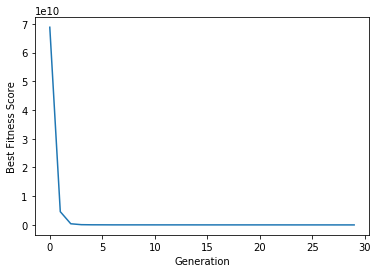

In [80]:
# GA Parameters
formula_degree = 4
number_of_solutions = 1000
number_of_parents = 500
population_size = (number_of_solutions,formula_degree) 
number_of_generations = 30
best_outputs = []

# Genesis
new_population = np.random.randint(low=0, high=10000, size=population_size)
print("The population of the first generation: ")
print(new_population)

# Evolution
print ("\nEvolution:")
# previous_fitness_mean = np.inf
for generation in range(number_of_generations):

    fitness = fitness_function(data, new_population)
    print("Generation = ", generation, "\tBest fitness = ", round(1/np.max(fitness),5))
    # best_outputs.append(np.max(np.sum(new_population*formula_degree, axis=1)))
    best_outputs.append(round(1/np.max(fitness),5))
    parents = biased_selection(new_population, fitness, number_of_parents)
    offspring_recombination = recombination(parents, offspring_size=(population_size[0]-parents.shape[0], formula_degree))
    offspring_mutation = mutation(offspring_recombination)
    new_population[0:parents.shape[0], :] = parents
    new_population[parents.shape[0]:, :] = offspring_mutation
    
#     if previous_fitness_mean < 1.05*np.mean(fitness):
#         break
#     previous_fitness_mean = np.mean(fitness)

# Results
print("\nThe population of the last generation: ")
print(new_population)
fitness = fitness_function(data, new_population)
best_match_idx = np.where(fitness == np.max(fitness))
print("Best solution: ", new_population[best_match_idx, :])

# Chart
plt.plot(best_outputs)
plt.xlabel("Generation")
plt.ylabel("Best Fitness Score")
plt.show()

## Part 2: Solving Different Problems With the Same GA

Below is a reminder of the K-Means algorithm you implemented in Assignment 21X.

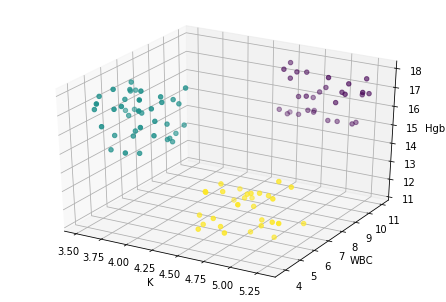

In [2]:
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

xlsx = pd.ExcelFile('EMR-Blood.xlsx')
sheet1 = xlsx.parse(0)
sheet1.set_index("Key", inplace=True)

variables1 = ["K","WBC","Hgb"]
EMR3d1 = sheet1.loc[:, variables1].values

y_pred_KMeans1 = KMeans(n_clusters=3).fit_predict(EMR3d1)

def make_chart (chart_data, y_pred, labels):
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.set_xlabel(labels[0])
    ax.set_ylabel(labels[1])
    ax.set_zlabel(labels[2])
    ax.scatter(chart_data[:,0], chart_data[:,1], chart_data[:,2], c=y_pred)

make_chart(EMR3d1, y_pred_KMeans1, variables1)

### Challenge 232
Solve the same clustering problem with a GA **without assuming K** (no iteration over differnet Ks), by trying to minimize the intra-cluster distances and maximize the inter-cluster distances.

**hint: You can build the population as the cluster assignment of each point or as cluster centers (consider coordinates boundaries)

In [15]:
from sklearn.metrics import calinski_harabasz_score as ch_score

In [59]:
def fitness_function(data, pop):
    fitness = []
    for solution in range(len(pop)):
        fitness.append(ch_score(data,pop[solution]))
    return fitness

def biased_selection(pop, fitness, num_parents):
    draw_index = np.random.choice(len(fitness), size=num_parents, replace=False, p=fitness/np.sum(fitness))
    return pop[draw_index,:]

def recombination(parents, offspring_size):
    offspring = np.empty(offspring_size)
    for k in range(offspring_size[0]):
        recombination_point = np.random.randint(0,offspring_size[1])
        parent1_idx = k%parents.shape[0]
        parent2_idx = (k+1)%parents.shape[0]
        offspring[k, 0:recombination_point] = parents[parent1_idx, 0:recombination_point]
        offspring[k, recombination_point:] = parents[parent2_idx, recombination_point:]
    return offspring

def mutation(offspring_recombination):
    for idx in range(offspring_recombination.shape[0]):
        random_value = np.random.randint(low=0, high=np.max(offspring_recombination[idx,:]))
        random_index = np.random.randint(0,offspring_recombination.shape[1])
        offspring_recombination[idx, random_index] = random_value
    return offspring_recombination


(1000, 100)
The population of the first generation: 
[[3. 3. 3. ... 2. 2. 2.]
 [1. 2. 0. ... 2. 0. 2.]
 [1. 2. 1. ... 2. 1. 1.]
 ...
 [0. 4. 0. ... 4. 1. 4.]
 [1. 2. 0. ... 3. 0. 4.]
 [0. 0. 0. ... 3. 1. 1.]]

Evolution:
Generation =  0 	Best fitness =  4.686241473706865
Generation =  1 	Best fitness =  5.257269433433016
Generation =  2 	Best fitness =  5.257269433433016
Generation =  3 	Best fitness =  5.257269433433016
Generation =  4 	Best fitness =  5.3733304554142896
Generation =  5 	Best fitness =  5.3733304554142896
Generation =  6 	Best fitness =  5.3733304554142896
Generation =  7 	Best fitness =  5.3733304554142896
Generation =  8 	Best fitness =  6.200020696525657
Generation =  9 	Best fitness =  6.200020696525657
Generation =  10 	Best fitness =  6.200020696525657
Generation =  11 	Best fitness =  6.064995335791484
Generation =  12 	Best fitness =  6.413841012910968
Generation =  13 	Best fitness =  6.413841012910968
Generation =  14 	Best fitness =  6.413841012910968
Gener

Generation =  152 	Best fitness =  60.18568408661754
Generation =  153 	Best fitness =  68.6031962609017
Generation =  154 	Best fitness =  68.6031962609017
Generation =  155 	Best fitness =  68.6031962609017
Generation =  156 	Best fitness =  68.6031962609017
Generation =  157 	Best fitness =  68.6031962609017
Generation =  158 	Best fitness =  68.6031962609017
Generation =  159 	Best fitness =  64.6803877476676
Generation =  160 	Best fitness =  64.6803877476676
Generation =  161 	Best fitness =  64.6803877476676
Generation =  162 	Best fitness =  68.0829899592232
Generation =  163 	Best fitness =  79.17543014432833
Generation =  164 	Best fitness =  68.0829899592232
Generation =  165 	Best fitness =  68.0829899592232
Generation =  166 	Best fitness =  68.0829899592232
Generation =  167 	Best fitness =  68.0829899592232
Generation =  168 	Best fitness =  68.0829899592232
Generation =  169 	Best fitness =  68.0829899592232
Generation =  170 	Best fitness =  68.0829899592232
Generation

Generation =  306 	Best fitness =  141.64631593605438
Generation =  307 	Best fitness =  141.64631593605438
Generation =  308 	Best fitness =  141.64631593605438
Generation =  309 	Best fitness =  141.64631593605438
Generation =  310 	Best fitness =  141.64631593605438
Generation =  311 	Best fitness =  141.64631593605438
Generation =  312 	Best fitness =  141.64631593605438
Generation =  313 	Best fitness =  141.64631593605438
Generation =  314 	Best fitness =  136.78095873177068
Generation =  315 	Best fitness =  136.78095873177068
Generation =  316 	Best fitness =  136.78095873177068
Generation =  317 	Best fitness =  135.72557258070682
Generation =  318 	Best fitness =  135.72557258070682
Generation =  319 	Best fitness =  174.6158869486329
Generation =  320 	Best fitness =  174.6158869486329
Generation =  321 	Best fitness =  152.56076450762285
Generation =  322 	Best fitness =  152.56076450762285
Generation =  323 	Best fitness =  152.56076450762285
Generation =  324 	Best fitnes

Generation =  459 	Best fitness =  204.88265229525626
Generation =  460 	Best fitness =  198.7166258076073
Generation =  461 	Best fitness =  197.5537097085334
Generation =  462 	Best fitness =  197.5537097085334
Generation =  463 	Best fitness =  198.25954981909703
Generation =  464 	Best fitness =  198.25954981909703
Generation =  465 	Best fitness =  198.25954981909703
Generation =  466 	Best fitness =  200.19619511413865
Generation =  467 	Best fitness =  200.84748455132126
Generation =  468 	Best fitness =  200.84748455132126
Generation =  469 	Best fitness =  195.1726780703206
Generation =  470 	Best fitness =  195.1726780703206
Generation =  471 	Best fitness =  195.1726780703206
Generation =  472 	Best fitness =  196.2347795604615
Generation =  473 	Best fitness =  196.2347795604615
Generation =  474 	Best fitness =  196.2347795604615
Generation =  475 	Best fitness =  196.2347795604615
Generation =  476 	Best fitness =  196.2347795604615
Generation =  477 	Best fitness =  196.

Generation =  612 	Best fitness =  198.43792621027583
Generation =  613 	Best fitness =  195.22777495322998
Generation =  614 	Best fitness =  202.01032998008137
Generation =  615 	Best fitness =  203.08927319105436
Generation =  616 	Best fitness =  203.08927319105436
Generation =  617 	Best fitness =  203.08927319105436
Generation =  618 	Best fitness =  203.08927319105436
Generation =  619 	Best fitness =  203.08927319105436
Generation =  620 	Best fitness =  187.69009460493942
Generation =  621 	Best fitness =  192.0069139164653
Generation =  622 	Best fitness =  221.70371041233395
Generation =  623 	Best fitness =  221.70371041233395
Generation =  624 	Best fitness =  221.70371041233395
Generation =  625 	Best fitness =  221.70371041233395
Generation =  626 	Best fitness =  221.70371041233395
Generation =  627 	Best fitness =  221.70371041233395
Generation =  628 	Best fitness =  221.70371041233395
Generation =  629 	Best fitness =  221.70371041233395
Generation =  630 	Best fitne

Generation =  765 	Best fitness =  280.8979062273936
Generation =  766 	Best fitness =  295.23160491348233
Generation =  767 	Best fitness =  295.23160491348233
Generation =  768 	Best fitness =  280.8979062273936
Generation =  769 	Best fitness =  283.88839340051874
Generation =  770 	Best fitness =  295.38381964665615
Generation =  771 	Best fitness =  295.38381964665615
Generation =  772 	Best fitness =  308.1650231236576
Generation =  773 	Best fitness =  308.1650231236576
Generation =  774 	Best fitness =  308.1650231236576
Generation =  775 	Best fitness =  308.1650231236576
Generation =  776 	Best fitness =  308.1650231236576
Generation =  777 	Best fitness =  308.1650231236576
Generation =  778 	Best fitness =  308.1650231236576
Generation =  779 	Best fitness =  308.1650231236576
Generation =  780 	Best fitness =  308.1650231236576
Generation =  781 	Best fitness =  308.1650231236576
Generation =  782 	Best fitness =  308.1650231236576
Generation =  783 	Best fitness =  308.16

Generation =  919 	Best fitness =  282.6528139639418
Generation =  920 	Best fitness =  282.6528139639418
Generation =  921 	Best fitness =  282.6528139639418
Generation =  922 	Best fitness =  299.32004981958727
Generation =  923 	Best fitness =  295.3603607308873
Generation =  924 	Best fitness =  288.169699066479
Generation =  925 	Best fitness =  295.3603607308873
Generation =  926 	Best fitness =  295.3603607308873
Generation =  927 	Best fitness =  295.3603607308873
Generation =  928 	Best fitness =  288.169699066479
Generation =  929 	Best fitness =  308.1650231236576
Generation =  930 	Best fitness =  288.169699066479
Generation =  931 	Best fitness =  299.32004981958727
Generation =  932 	Best fitness =  299.32004981958727
Generation =  933 	Best fitness =  299.32004981958727
Generation =  934 	Best fitness =  299.32004981958727
Generation =  935 	Best fitness =  299.32004981958727
Generation =  936 	Best fitness =  299.32004981958727
Generation =  937 	Best fitness =  299.320

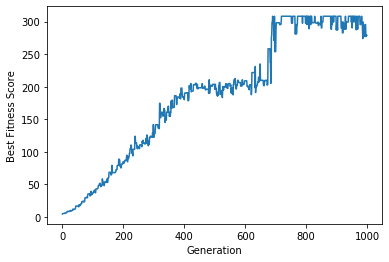

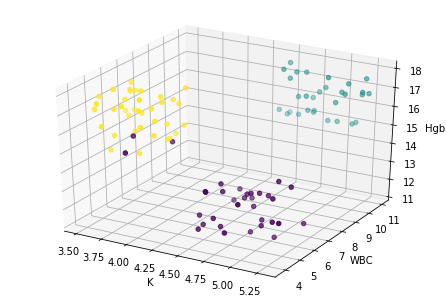

In [74]:
# GA Parameters
max_number_of_clusters = 6
number_of_solutions = 1000
number_of_parents = 500
population_size = (number_of_solutions,EMR3d1.shape[0]) 
number_of_generations = 1000
best_outputs = []
new_population = np.empty(population_size)

data = EMR3d1

# Genesis
for i in range(number_of_solutions):
    new_population[i] = np.random.randint(low=0, high=np.random.randint(low=2, high=max_number_of_clusters), 
                                          size=(1,population_size[1]))
    
print(new_population.shape)
print("The population of the first generation: ")
print(new_population)

# Evolution
print ("\nEvolution:")
for generation in range(number_of_generations):

    fitness = fitness_function(data, new_population)
    print("Generation = ", generation, "\tBest fitness = ", np.max(fitness))
    best_outputs.append(np.max(fitness))
    parents = biased_selection(new_population, fitness, number_of_parents)
    offspring_recombination = recombination(parents, offspring_size=(population_size[0]-parents.shape[0], EMR3d1.shape[0]))
    offspring_mutation = mutation(offspring_recombination)
    new_population[0:parents.shape[0], :] = parents
    new_population[parents.shape[0]:, :] = offspring_mutation
    
# Results
print("\nThe population of the last generation: ")
print(new_population)
fitness = fitness_function(data, new_population)
best_match_idx = np.where(fitness == np.max(fitness))
print("Best solution: ", new_population[best_match_idx[0], :])

# Chart
plt.plot(best_outputs)
plt.xlabel("Generation")
plt.ylabel("Best Fitness Score")
plt.show()

make_chart(EMR3d1, np.squeeze(new_population[best_match_idx[0], :]), variables1)

## Challenge 233: Reconstruct Image (Bonus)
In this part you will attemp to generate an image which is closest to a target image given. 

First we will load the image from a file:


In [0]:
import matplotlib.image as mpimg

img=mpimg.imread('pexels-photo-57905.jpeg')

For simplicity (and running time), we focus on a small part of the image:

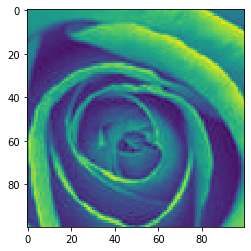

In [64]:
import matplotlib.pyplot as plt
imgplot = plt.imshow(img[100:200,200:300,0])

And we will define this part as out target image to reconstruct:

In [0]:
target = img[100:200,200:300,0]

Your mission is to generate an image starting at random noise. The goal is to get an image as close as possible to the target. Don;t worry if it's still noisy...
FYI: GA are not the best solution for these types of problems ;)
You can use these blog posts to give you ideas:
https://towardsdatascience.com/genetic-algorithm-implementation-in-python-5ab67bb124a6

https://heartbeat.fritz.ai/reproducing-images-using-a-genetic-algorithm-with-python-91fc701ff84

In [0]:
# Your code here